# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
#!pip install tensorflow==2.2.0
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\Dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

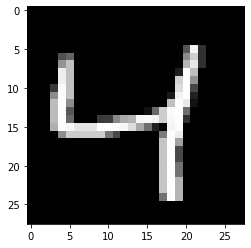

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [22]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 128 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float64, (None, 784), name = 'inputs_')
targets_ = tf.placeholder(tf.float64, (None, 784), name = 'targets_')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation = tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 784)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-08, use_locking=False, name='Adam').minimize(cost)

## Training

In [23]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [24]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6985
Epoch: 1/20... Training loss: 0.6853
Epoch: 1/20... Training loss: 0.6725
Epoch: 1/20... Training loss: 0.6573
Epoch: 1/20... Training loss: 0.6411
Epoch: 1/20... Training loss: 0.6220
Epoch: 1/20... Training loss: 0.5990
Epoch: 1/20... Training loss: 0.5706
Epoch: 1/20... Training loss: 0.5441
Epoch: 1/20... Training loss: 0.5163
Epoch: 1/20... Training loss: 0.4843
Epoch: 1/20... Training loss: 0.4548
Epoch: 1/20... Training loss: 0.4324
Epoch: 1/20... Training loss: 0.3996
Epoch: 1/20... Training loss: 0.3854
Epoch: 1/20... Training loss: 0.3623
Epoch: 1/20... Training loss: 0.3410
Epoch: 1/20... Training loss: 0.3425
Epoch: 1/20... Training loss: 0.3139
Epoch: 1/20... Training loss: 0.3216
Epoch: 1/20... Training loss: 0.3117
Epoch: 1/20... Training loss: 0.3080
Epoch: 1/20... Training loss: 0.2932
Epoch: 1/20... Training loss: 0.2955
Epoch: 1/20... Training loss: 0.2842
Epoch: 1/20... Training loss: 0.2889
Epoch: 1/20... Training loss: 0.2804
E

Epoch: 1/20... Training loss: 0.1314
Epoch: 1/20... Training loss: 0.1373
Epoch: 1/20... Training loss: 0.1437
Epoch: 1/20... Training loss: 0.1399
Epoch: 1/20... Training loss: 0.1396
Epoch: 1/20... Training loss: 0.1407
Epoch: 1/20... Training loss: 0.1411
Epoch: 1/20... Training loss: 0.1383
Epoch: 1/20... Training loss: 0.1429
Epoch: 1/20... Training loss: 0.1407
Epoch: 1/20... Training loss: 0.1403
Epoch: 1/20... Training loss: 0.1358
Epoch: 1/20... Training loss: 0.1382
Epoch: 1/20... Training loss: 0.1358
Epoch: 1/20... Training loss: 0.1343
Epoch: 1/20... Training loss: 0.1388
Epoch: 1/20... Training loss: 0.1349
Epoch: 1/20... Training loss: 0.1340
Epoch: 1/20... Training loss: 0.1356
Epoch: 1/20... Training loss: 0.1412
Epoch: 1/20... Training loss: 0.1323
Epoch: 1/20... Training loss: 0.1318
Epoch: 1/20... Training loss: 0.1385
Epoch: 1/20... Training loss: 0.1395
Epoch: 1/20... Training loss: 0.1366
Epoch: 1/20... Training loss: 0.1320
Epoch: 1/20... Training loss: 0.1297
E

Epoch: 2/20... Training loss: 0.1084
Epoch: 2/20... Training loss: 0.1061
Epoch: 2/20... Training loss: 0.1073
Epoch: 2/20... Training loss: 0.1081
Epoch: 2/20... Training loss: 0.1094
Epoch: 2/20... Training loss: 0.1051
Epoch: 2/20... Training loss: 0.1038
Epoch: 2/20... Training loss: 0.1072
Epoch: 2/20... Training loss: 0.1057
Epoch: 2/20... Training loss: 0.1075
Epoch: 2/20... Training loss: 0.1073
Epoch: 2/20... Training loss: 0.1053
Epoch: 2/20... Training loss: 0.1067
Epoch: 2/20... Training loss: 0.1059
Epoch: 2/20... Training loss: 0.1069
Epoch: 2/20... Training loss: 0.1105
Epoch: 2/20... Training loss: 0.1054
Epoch: 2/20... Training loss: 0.1030
Epoch: 2/20... Training loss: 0.1078
Epoch: 2/20... Training loss: 0.1024
Epoch: 2/20... Training loss: 0.1056
Epoch: 2/20... Training loss: 0.1048
Epoch: 2/20... Training loss: 0.1027
Epoch: 2/20... Training loss: 0.1043
Epoch: 2/20... Training loss: 0.1037
Epoch: 2/20... Training loss: 0.1029
Epoch: 2/20... Training loss: 0.1058
E

Epoch: 3/20... Training loss: 0.0924
Epoch: 3/20... Training loss: 0.0928
Epoch: 3/20... Training loss: 0.0917
Epoch: 3/20... Training loss: 0.0916
Epoch: 3/20... Training loss: 0.0897
Epoch: 3/20... Training loss: 0.0882
Epoch: 3/20... Training loss: 0.0907
Epoch: 3/20... Training loss: 0.0948
Epoch: 3/20... Training loss: 0.0949
Epoch: 3/20... Training loss: 0.0931
Epoch: 3/20... Training loss: 0.0943
Epoch: 3/20... Training loss: 0.0922
Epoch: 3/20... Training loss: 0.0901
Epoch: 3/20... Training loss: 0.0936
Epoch: 3/20... Training loss: 0.0905
Epoch: 3/20... Training loss: 0.0925
Epoch: 3/20... Training loss: 0.0916
Epoch: 3/20... Training loss: 0.0945
Epoch: 3/20... Training loss: 0.0902
Epoch: 3/20... Training loss: 0.0930
Epoch: 3/20... Training loss: 0.0877
Epoch: 3/20... Training loss: 0.0900
Epoch: 3/20... Training loss: 0.0892
Epoch: 3/20... Training loss: 0.0950
Epoch: 3/20... Training loss: 0.0900
Epoch: 3/20... Training loss: 0.0898
Epoch: 3/20... Training loss: 0.0892
E

Epoch: 4/20... Training loss: 0.0840
Epoch: 4/20... Training loss: 0.0834
Epoch: 4/20... Training loss: 0.0864
Epoch: 4/20... Training loss: 0.0870
Epoch: 4/20... Training loss: 0.0820
Epoch: 4/20... Training loss: 0.0867
Epoch: 4/20... Training loss: 0.0812
Epoch: 4/20... Training loss: 0.0820
Epoch: 4/20... Training loss: 0.0857
Epoch: 4/20... Training loss: 0.0844
Epoch: 4/20... Training loss: 0.0809
Epoch: 4/20... Training loss: 0.0836
Epoch: 4/20... Training loss: 0.0822
Epoch: 4/20... Training loss: 0.0839
Epoch: 4/20... Training loss: 0.0831
Epoch: 4/20... Training loss: 0.0841
Epoch: 4/20... Training loss: 0.0823
Epoch: 4/20... Training loss: 0.0834
Epoch: 4/20... Training loss: 0.0822
Epoch: 4/20... Training loss: 0.0844
Epoch: 4/20... Training loss: 0.0836
Epoch: 4/20... Training loss: 0.0817
Epoch: 4/20... Training loss: 0.0819
Epoch: 4/20... Training loss: 0.0872
Epoch: 4/20... Training loss: 0.0829
Epoch: 4/20... Training loss: 0.0839
Epoch: 4/20... Training loss: 0.0808
E

Epoch: 4/20... Training loss: 0.0747
Epoch: 4/20... Training loss: 0.0798
Epoch: 4/20... Training loss: 0.0795
Epoch: 4/20... Training loss: 0.0784
Epoch: 4/20... Training loss: 0.0792
Epoch: 4/20... Training loss: 0.0789
Epoch: 4/20... Training loss: 0.0789
Epoch: 4/20... Training loss: 0.0787
Epoch: 4/20... Training loss: 0.0775
Epoch: 4/20... Training loss: 0.0798
Epoch: 4/20... Training loss: 0.0774
Epoch: 4/20... Training loss: 0.0808
Epoch: 4/20... Training loss: 0.0783
Epoch: 4/20... Training loss: 0.0779
Epoch: 4/20... Training loss: 0.0801
Epoch: 4/20... Training loss: 0.0787
Epoch: 4/20... Training loss: 0.0794
Epoch: 4/20... Training loss: 0.0790
Epoch: 4/20... Training loss: 0.0781
Epoch: 4/20... Training loss: 0.0789
Epoch: 4/20... Training loss: 0.0772
Epoch: 4/20... Training loss: 0.0776
Epoch: 4/20... Training loss: 0.0796
Epoch: 4/20... Training loss: 0.0769
Epoch: 4/20... Training loss: 0.0798
Epoch: 4/20... Training loss: 0.0794
Epoch: 4/20... Training loss: 0.0804
E

Epoch: 5/20... Training loss: 0.0730
Epoch: 5/20... Training loss: 0.0747
Epoch: 5/20... Training loss: 0.0761
Epoch: 5/20... Training loss: 0.0755
Epoch: 5/20... Training loss: 0.0754
Epoch: 5/20... Training loss: 0.0751
Epoch: 5/20... Training loss: 0.0725
Epoch: 5/20... Training loss: 0.0761
Epoch: 5/20... Training loss: 0.0765
Epoch: 5/20... Training loss: 0.0763
Epoch: 5/20... Training loss: 0.0761
Epoch: 5/20... Training loss: 0.0756
Epoch: 5/20... Training loss: 0.0772
Epoch: 5/20... Training loss: 0.0758
Epoch: 5/20... Training loss: 0.0740
Epoch: 5/20... Training loss: 0.0747
Epoch: 5/20... Training loss: 0.0732
Epoch: 5/20... Training loss: 0.0785
Epoch: 5/20... Training loss: 0.0755
Epoch: 5/20... Training loss: 0.0759
Epoch: 5/20... Training loss: 0.0753
Epoch: 5/20... Training loss: 0.0744
Epoch: 5/20... Training loss: 0.0762
Epoch: 5/20... Training loss: 0.0747
Epoch: 5/20... Training loss: 0.0763
Epoch: 5/20... Training loss: 0.0740
Epoch: 5/20... Training loss: 0.0741
E

Epoch: 6/20... Training loss: 0.0739
Epoch: 6/20... Training loss: 0.0738
Epoch: 6/20... Training loss: 0.0710
Epoch: 6/20... Training loss: 0.0728
Epoch: 6/20... Training loss: 0.0739
Epoch: 6/20... Training loss: 0.0767
Epoch: 6/20... Training loss: 0.0739
Epoch: 6/20... Training loss: 0.0718
Epoch: 6/20... Training loss: 0.0766
Epoch: 6/20... Training loss: 0.0751
Epoch: 6/20... Training loss: 0.0738
Epoch: 6/20... Training loss: 0.0744
Epoch: 6/20... Training loss: 0.0744
Epoch: 6/20... Training loss: 0.0707
Epoch: 6/20... Training loss: 0.0717
Epoch: 6/20... Training loss: 0.0745
Epoch: 6/20... Training loss: 0.0731
Epoch: 6/20... Training loss: 0.0727
Epoch: 6/20... Training loss: 0.0712
Epoch: 6/20... Training loss: 0.0740
Epoch: 6/20... Training loss: 0.0716
Epoch: 6/20... Training loss: 0.0753
Epoch: 6/20... Training loss: 0.0756
Epoch: 6/20... Training loss: 0.0725
Epoch: 6/20... Training loss: 0.0762
Epoch: 6/20... Training loss: 0.0743
Epoch: 6/20... Training loss: 0.0744
E

Epoch: 7/20... Training loss: 0.0701
Epoch: 7/20... Training loss: 0.0726
Epoch: 7/20... Training loss: 0.0735
Epoch: 7/20... Training loss: 0.0711
Epoch: 7/20... Training loss: 0.0718
Epoch: 7/20... Training loss: 0.0732
Epoch: 7/20... Training loss: 0.0714
Epoch: 7/20... Training loss: 0.0747
Epoch: 7/20... Training loss: 0.0734
Epoch: 7/20... Training loss: 0.0730
Epoch: 7/20... Training loss: 0.0733
Epoch: 7/20... Training loss: 0.0734
Epoch: 7/20... Training loss: 0.0733
Epoch: 7/20... Training loss: 0.0699
Epoch: 7/20... Training loss: 0.0704
Epoch: 7/20... Training loss: 0.0725
Epoch: 7/20... Training loss: 0.0701
Epoch: 7/20... Training loss: 0.0728
Epoch: 7/20... Training loss: 0.0703
Epoch: 7/20... Training loss: 0.0703
Epoch: 7/20... Training loss: 0.0724
Epoch: 7/20... Training loss: 0.0693
Epoch: 7/20... Training loss: 0.0725
Epoch: 7/20... Training loss: 0.0711
Epoch: 7/20... Training loss: 0.0712
Epoch: 7/20... Training loss: 0.0746
Epoch: 7/20... Training loss: 0.0728
E

Epoch: 7/20... Training loss: 0.0725
Epoch: 7/20... Training loss: 0.0702
Epoch: 7/20... Training loss: 0.0711
Epoch: 7/20... Training loss: 0.0716
Epoch: 7/20... Training loss: 0.0709
Epoch: 7/20... Training loss: 0.0688
Epoch: 7/20... Training loss: 0.0717
Epoch: 7/20... Training loss: 0.0693
Epoch: 7/20... Training loss: 0.0708
Epoch: 7/20... Training loss: 0.0706
Epoch: 7/20... Training loss: 0.0709
Epoch: 7/20... Training loss: 0.0713
Epoch: 7/20... Training loss: 0.0710
Epoch: 7/20... Training loss: 0.0719
Epoch: 7/20... Training loss: 0.0705
Epoch: 7/20... Training loss: 0.0716
Epoch: 7/20... Training loss: 0.0711
Epoch: 7/20... Training loss: 0.0721
Epoch: 7/20... Training loss: 0.0710
Epoch: 7/20... Training loss: 0.0709
Epoch: 7/20... Training loss: 0.0709
Epoch: 7/20... Training loss: 0.0709
Epoch: 7/20... Training loss: 0.0723
Epoch: 7/20... Training loss: 0.0713
Epoch: 7/20... Training loss: 0.0719
Epoch: 7/20... Training loss: 0.0708
Epoch: 7/20... Training loss: 0.0735
E

Epoch: 8/20... Training loss: 0.0684
Epoch: 8/20... Training loss: 0.0707
Epoch: 8/20... Training loss: 0.0711
Epoch: 8/20... Training loss: 0.0702
Epoch: 8/20... Training loss: 0.0689
Epoch: 8/20... Training loss: 0.0687
Epoch: 8/20... Training loss: 0.0707
Epoch: 8/20... Training loss: 0.0702
Epoch: 8/20... Training loss: 0.0711
Epoch: 8/20... Training loss: 0.0705
Epoch: 8/20... Training loss: 0.0707
Epoch: 8/20... Training loss: 0.0704
Epoch: 8/20... Training loss: 0.0694
Epoch: 8/20... Training loss: 0.0722
Epoch: 8/20... Training loss: 0.0700
Epoch: 8/20... Training loss: 0.0697
Epoch: 8/20... Training loss: 0.0706
Epoch: 8/20... Training loss: 0.0717
Epoch: 8/20... Training loss: 0.0698
Epoch: 8/20... Training loss: 0.0680
Epoch: 8/20... Training loss: 0.0705
Epoch: 8/20... Training loss: 0.0702
Epoch: 8/20... Training loss: 0.0702
Epoch: 8/20... Training loss: 0.0716
Epoch: 8/20... Training loss: 0.0697
Epoch: 8/20... Training loss: 0.0701
Epoch: 8/20... Training loss: 0.0706
E

Epoch: 9/20... Training loss: 0.0714
Epoch: 9/20... Training loss: 0.0699
Epoch: 9/20... Training loss: 0.0685
Epoch: 9/20... Training loss: 0.0702
Epoch: 9/20... Training loss: 0.0710
Epoch: 9/20... Training loss: 0.0708
Epoch: 9/20... Training loss: 0.0703
Epoch: 9/20... Training loss: 0.0704
Epoch: 9/20... Training loss: 0.0696
Epoch: 9/20... Training loss: 0.0695
Epoch: 9/20... Training loss: 0.0712
Epoch: 9/20... Training loss: 0.0711
Epoch: 9/20... Training loss: 0.0697
Epoch: 9/20... Training loss: 0.0683
Epoch: 9/20... Training loss: 0.0709
Epoch: 9/20... Training loss: 0.0705
Epoch: 9/20... Training loss: 0.0694
Epoch: 9/20... Training loss: 0.0700
Epoch: 9/20... Training loss: 0.0713
Epoch: 9/20... Training loss: 0.0695
Epoch: 9/20... Training loss: 0.0704
Epoch: 9/20... Training loss: 0.0680
Epoch: 9/20... Training loss: 0.0707
Epoch: 9/20... Training loss: 0.0688
Epoch: 9/20... Training loss: 0.0697
Epoch: 9/20... Training loss: 0.0691
Epoch: 9/20... Training loss: 0.0679
E

Epoch: 10/20... Training loss: 0.0692
Epoch: 10/20... Training loss: 0.0678
Epoch: 10/20... Training loss: 0.0687
Epoch: 10/20... Training loss: 0.0678
Epoch: 10/20... Training loss: 0.0688
Epoch: 10/20... Training loss: 0.0707
Epoch: 10/20... Training loss: 0.0682
Epoch: 10/20... Training loss: 0.0690
Epoch: 10/20... Training loss: 0.0687
Epoch: 10/20... Training loss: 0.0668
Epoch: 10/20... Training loss: 0.0681
Epoch: 10/20... Training loss: 0.0703
Epoch: 10/20... Training loss: 0.0702
Epoch: 10/20... Training loss: 0.0693
Epoch: 10/20... Training loss: 0.0684
Epoch: 10/20... Training loss: 0.0700
Epoch: 10/20... Training loss: 0.0704
Epoch: 10/20... Training loss: 0.0696
Epoch: 10/20... Training loss: 0.0700
Epoch: 10/20... Training loss: 0.0665
Epoch: 10/20... Training loss: 0.0684
Epoch: 10/20... Training loss: 0.0686
Epoch: 10/20... Training loss: 0.0679
Epoch: 10/20... Training loss: 0.0698
Epoch: 10/20... Training loss: 0.0698
Epoch: 10/20... Training loss: 0.0681
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0689
Epoch: 10/20... Training loss: 0.0687
Epoch: 10/20... Training loss: 0.0700
Epoch: 10/20... Training loss: 0.0681
Epoch: 10/20... Training loss: 0.0705
Epoch: 10/20... Training loss: 0.0681
Epoch: 10/20... Training loss: 0.0691
Epoch: 10/20... Training loss: 0.0677
Epoch: 10/20... Training loss: 0.0719
Epoch: 10/20... Training loss: 0.0681
Epoch: 10/20... Training loss: 0.0688
Epoch: 10/20... Training loss: 0.0682
Epoch: 10/20... Training loss: 0.0688
Epoch: 10/20... Training loss: 0.0695
Epoch: 10/20... Training loss: 0.0675
Epoch: 10/20... Training loss: 0.0693
Epoch: 10/20... Training loss: 0.0687
Epoch: 10/20... Training loss: 0.0686
Epoch: 10/20... Training loss: 0.0689
Epoch: 10/20... Training loss: 0.0697
Epoch: 10/20... Training loss: 0.0692
Epoch: 10/20... Training loss: 0.0693
Epoch: 10/20... Training loss: 0.0690
Epoch: 10/20... Training loss: 0.0721
Epoch: 10/20... Training loss: 0.0695
Epoch: 10/20... Training loss: 0.0672
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0692
Epoch: 11/20... Training loss: 0.0684
Epoch: 11/20... Training loss: 0.0687
Epoch: 11/20... Training loss: 0.0661
Epoch: 11/20... Training loss: 0.0659
Epoch: 11/20... Training loss: 0.0689
Epoch: 11/20... Training loss: 0.0701
Epoch: 11/20... Training loss: 0.0686
Epoch: 11/20... Training loss: 0.0685
Epoch: 11/20... Training loss: 0.0692
Epoch: 11/20... Training loss: 0.0671
Epoch: 11/20... Training loss: 0.0676
Epoch: 11/20... Training loss: 0.0675
Epoch: 11/20... Training loss: 0.0676
Epoch: 11/20... Training loss: 0.0674
Epoch: 11/20... Training loss: 0.0692
Epoch: 11/20... Training loss: 0.0665
Epoch: 11/20... Training loss: 0.0710
Epoch: 11/20... Training loss: 0.0691
Epoch: 11/20... Training loss: 0.0674
Epoch: 11/20... Training loss: 0.0698
Epoch: 11/20... Training loss: 0.0692
Epoch: 11/20... Training loss: 0.0705
Epoch: 11/20... Training loss: 0.0685
Epoch: 11/20... Training loss: 0.0684
Epoch: 11/20... Training loss: 0.0687
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0683
Epoch: 12/20... Training loss: 0.0669
Epoch: 12/20... Training loss: 0.0661
Epoch: 12/20... Training loss: 0.0652
Epoch: 12/20... Training loss: 0.0685
Epoch: 12/20... Training loss: 0.0686
Epoch: 12/20... Training loss: 0.0713
Epoch: 12/20... Training loss: 0.0680
Epoch: 12/20... Training loss: 0.0685
Epoch: 12/20... Training loss: 0.0683
Epoch: 12/20... Training loss: 0.0668
Epoch: 12/20... Training loss: 0.0679
Epoch: 12/20... Training loss: 0.0678
Epoch: 12/20... Training loss: 0.0664
Epoch: 12/20... Training loss: 0.0667
Epoch: 12/20... Training loss: 0.0681
Epoch: 12/20... Training loss: 0.0681
Epoch: 12/20... Training loss: 0.0688
Epoch: 12/20... Training loss: 0.0668
Epoch: 12/20... Training loss: 0.0656
Epoch: 12/20... Training loss: 0.0671
Epoch: 12/20... Training loss: 0.0689
Epoch: 12/20... Training loss: 0.0684
Epoch: 12/20... Training loss: 0.0653
Epoch: 12/20... Training loss: 0.0672
Epoch: 12/20... Training loss: 0.0667
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0671
Epoch: 13/20... Training loss: 0.0688
Epoch: 13/20... Training loss: 0.0669
Epoch: 13/20... Training loss: 0.0661
Epoch: 13/20... Training loss: 0.0688
Epoch: 13/20... Training loss: 0.0683
Epoch: 13/20... Training loss: 0.0676
Epoch: 13/20... Training loss: 0.0692
Epoch: 13/20... Training loss: 0.0674
Epoch: 13/20... Training loss: 0.0675
Epoch: 13/20... Training loss: 0.0685
Epoch: 13/20... Training loss: 0.0677
Epoch: 13/20... Training loss: 0.0683
Epoch: 13/20... Training loss: 0.0680
Epoch: 13/20... Training loss: 0.0696
Epoch: 13/20... Training loss: 0.0675
Epoch: 13/20... Training loss: 0.0660
Epoch: 13/20... Training loss: 0.0698
Epoch: 13/20... Training loss: 0.0692
Epoch: 13/20... Training loss: 0.0664
Epoch: 13/20... Training loss: 0.0680
Epoch: 13/20... Training loss: 0.0675
Epoch: 13/20... Training loss: 0.0697
Epoch: 13/20... Training loss: 0.0681
Epoch: 13/20... Training loss: 0.0689
Epoch: 13/20... Training loss: 0.0672
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0667
Epoch: 13/20... Training loss: 0.0668
Epoch: 13/20... Training loss: 0.0659
Epoch: 13/20... Training loss: 0.0679
Epoch: 13/20... Training loss: 0.0703
Epoch: 13/20... Training loss: 0.0675
Epoch: 13/20... Training loss: 0.0688
Epoch: 13/20... Training loss: 0.0674
Epoch: 13/20... Training loss: 0.0676
Epoch: 13/20... Training loss: 0.0673
Epoch: 13/20... Training loss: 0.0672
Epoch: 13/20... Training loss: 0.0678
Epoch: 13/20... Training loss: 0.0683
Epoch: 13/20... Training loss: 0.0676
Epoch: 13/20... Training loss: 0.0674
Epoch: 13/20... Training loss: 0.0663
Epoch: 13/20... Training loss: 0.0673
Epoch: 13/20... Training loss: 0.0670
Epoch: 13/20... Training loss: 0.0670
Epoch: 13/20... Training loss: 0.0679
Epoch: 13/20... Training loss: 0.0679
Epoch: 13/20... Training loss: 0.0679
Epoch: 13/20... Training loss: 0.0687
Epoch: 13/20... Training loss: 0.0691
Epoch: 13/20... Training loss: 0.0673
Epoch: 13/20... Training loss: 0.0668
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0664
Epoch: 14/20... Training loss: 0.0664
Epoch: 14/20... Training loss: 0.0666
Epoch: 14/20... Training loss: 0.0676
Epoch: 14/20... Training loss: 0.0656
Epoch: 14/20... Training loss: 0.0654
Epoch: 14/20... Training loss: 0.0655
Epoch: 14/20... Training loss: 0.0667
Epoch: 14/20... Training loss: 0.0688
Epoch: 14/20... Training loss: 0.0681
Epoch: 14/20... Training loss: 0.0670
Epoch: 14/20... Training loss: 0.0677
Epoch: 14/20... Training loss: 0.0684
Epoch: 14/20... Training loss: 0.0668
Epoch: 14/20... Training loss: 0.0647
Epoch: 14/20... Training loss: 0.0656
Epoch: 14/20... Training loss: 0.0678
Epoch: 14/20... Training loss: 0.0666
Epoch: 14/20... Training loss: 0.0672
Epoch: 14/20... Training loss: 0.0655
Epoch: 14/20... Training loss: 0.0663
Epoch: 14/20... Training loss: 0.0664
Epoch: 14/20... Training loss: 0.0657
Epoch: 14/20... Training loss: 0.0683
Epoch: 14/20... Training loss: 0.0663
Epoch: 14/20... Training loss: 0.0692
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0661
Epoch: 15/20... Training loss: 0.0658
Epoch: 15/20... Training loss: 0.0651
Epoch: 15/20... Training loss: 0.0671
Epoch: 15/20... Training loss: 0.0686
Epoch: 15/20... Training loss: 0.0670
Epoch: 15/20... Training loss: 0.0655
Epoch: 15/20... Training loss: 0.0656
Epoch: 15/20... Training loss: 0.0676
Epoch: 15/20... Training loss: 0.0670
Epoch: 15/20... Training loss: 0.0673
Epoch: 15/20... Training loss: 0.0685
Epoch: 15/20... Training loss: 0.0679
Epoch: 15/20... Training loss: 0.0693
Epoch: 15/20... Training loss: 0.0673
Epoch: 15/20... Training loss: 0.0694
Epoch: 15/20... Training loss: 0.0669
Epoch: 15/20... Training loss: 0.0664
Epoch: 15/20... Training loss: 0.0665
Epoch: 15/20... Training loss: 0.0681
Epoch: 15/20... Training loss: 0.0676
Epoch: 15/20... Training loss: 0.0671
Epoch: 15/20... Training loss: 0.0665
Epoch: 15/20... Training loss: 0.0666
Epoch: 15/20... Training loss: 0.0684
Epoch: 15/20... Training loss: 0.0674
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0680
Epoch: 15/20... Training loss: 0.0669
Epoch: 15/20... Training loss: 0.0685
Epoch: 15/20... Training loss: 0.0650
Epoch: 15/20... Training loss: 0.0664
Epoch: 15/20... Training loss: 0.0675
Epoch: 15/20... Training loss: 0.0672
Epoch: 15/20... Training loss: 0.0681
Epoch: 15/20... Training loss: 0.0663
Epoch: 15/20... Training loss: 0.0635
Epoch: 15/20... Training loss: 0.0671
Epoch: 15/20... Training loss: 0.0672
Epoch: 15/20... Training loss: 0.0671
Epoch: 15/20... Training loss: 0.0643
Epoch: 15/20... Training loss: 0.0678
Epoch: 15/20... Training loss: 0.0663
Epoch: 15/20... Training loss: 0.0653
Epoch: 15/20... Training loss: 0.0681
Epoch: 15/20... Training loss: 0.0664
Epoch: 15/20... Training loss: 0.0687
Epoch: 15/20... Training loss: 0.0646
Epoch: 15/20... Training loss: 0.0663
Epoch: 15/20... Training loss: 0.0664
Epoch: 15/20... Training loss: 0.0674
Epoch: 16/20... Training loss: 0.0691
Epoch: 16/20... Training loss: 0.0676
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0672
Epoch: 16/20... Training loss: 0.0685
Epoch: 16/20... Training loss: 0.0687
Epoch: 16/20... Training loss: 0.0691
Epoch: 16/20... Training loss: 0.0655
Epoch: 16/20... Training loss: 0.0686
Epoch: 16/20... Training loss: 0.0658
Epoch: 16/20... Training loss: 0.0680
Epoch: 16/20... Training loss: 0.0672
Epoch: 16/20... Training loss: 0.0669
Epoch: 16/20... Training loss: 0.0670
Epoch: 16/20... Training loss: 0.0666
Epoch: 16/20... Training loss: 0.0672
Epoch: 16/20... Training loss: 0.0673
Epoch: 16/20... Training loss: 0.0687
Epoch: 16/20... Training loss: 0.0661
Epoch: 16/20... Training loss: 0.0649
Epoch: 16/20... Training loss: 0.0686
Epoch: 16/20... Training loss: 0.0676
Epoch: 16/20... Training loss: 0.0673
Epoch: 16/20... Training loss: 0.0670
Epoch: 16/20... Training loss: 0.0653
Epoch: 16/20... Training loss: 0.0679
Epoch: 16/20... Training loss: 0.0678
Epoch: 16/20... Training loss: 0.0673
Epoch: 16/20... Training loss: 0.0685
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0670
Epoch: 17/20... Training loss: 0.0684
Epoch: 17/20... Training loss: 0.0677
Epoch: 17/20... Training loss: 0.0662
Epoch: 17/20... Training loss: 0.0678
Epoch: 17/20... Training loss: 0.0679
Epoch: 17/20... Training loss: 0.0669
Epoch: 17/20... Training loss: 0.0671
Epoch: 17/20... Training loss: 0.0681
Epoch: 17/20... Training loss: 0.0684
Epoch: 17/20... Training loss: 0.0680
Epoch: 17/20... Training loss: 0.0683
Epoch: 17/20... Training loss: 0.0675
Epoch: 17/20... Training loss: 0.0661
Epoch: 17/20... Training loss: 0.0664
Epoch: 17/20... Training loss: 0.0667
Epoch: 17/20... Training loss: 0.0692
Epoch: 17/20... Training loss: 0.0679
Epoch: 17/20... Training loss: 0.0691
Epoch: 17/20... Training loss: 0.0642
Epoch: 17/20... Training loss: 0.0670
Epoch: 17/20... Training loss: 0.0666
Epoch: 17/20... Training loss: 0.0660
Epoch: 17/20... Training loss: 0.0660
Epoch: 17/20... Training loss: 0.0686
Epoch: 17/20... Training loss: 0.0654
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0660
Epoch: 18/20... Training loss: 0.0660
Epoch: 18/20... Training loss: 0.0683
Epoch: 18/20... Training loss: 0.0688
Epoch: 18/20... Training loss: 0.0681
Epoch: 18/20... Training loss: 0.0666
Epoch: 18/20... Training loss: 0.0653
Epoch: 18/20... Training loss: 0.0665
Epoch: 18/20... Training loss: 0.0665
Epoch: 18/20... Training loss: 0.0667
Epoch: 18/20... Training loss: 0.0676
Epoch: 18/20... Training loss: 0.0676
Epoch: 18/20... Training loss: 0.0680
Epoch: 18/20... Training loss: 0.0668
Epoch: 18/20... Training loss: 0.0666
Epoch: 18/20... Training loss: 0.0675
Epoch: 18/20... Training loss: 0.0684
Epoch: 18/20... Training loss: 0.0671
Epoch: 18/20... Training loss: 0.0666
Epoch: 18/20... Training loss: 0.0672
Epoch: 18/20... Training loss: 0.0646
Epoch: 18/20... Training loss: 0.0666
Epoch: 18/20... Training loss: 0.0685
Epoch: 18/20... Training loss: 0.0654
Epoch: 18/20... Training loss: 0.0658
Epoch: 18/20... Training loss: 0.0670
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0675
Epoch: 18/20... Training loss: 0.0657
Epoch: 18/20... Training loss: 0.0675
Epoch: 18/20... Training loss: 0.0667
Epoch: 18/20... Training loss: 0.0678
Epoch: 18/20... Training loss: 0.0662
Epoch: 18/20... Training loss: 0.0656
Epoch: 18/20... Training loss: 0.0660
Epoch: 18/20... Training loss: 0.0675
Epoch: 18/20... Training loss: 0.0681
Epoch: 18/20... Training loss: 0.0654
Epoch: 18/20... Training loss: 0.0665
Epoch: 18/20... Training loss: 0.0662
Epoch: 18/20... Training loss: 0.0665
Epoch: 18/20... Training loss: 0.0656
Epoch: 18/20... Training loss: 0.0659
Epoch: 18/20... Training loss: 0.0673
Epoch: 18/20... Training loss: 0.0658
Epoch: 18/20... Training loss: 0.0672
Epoch: 18/20... Training loss: 0.0664
Epoch: 18/20... Training loss: 0.0660
Epoch: 18/20... Training loss: 0.0665
Epoch: 18/20... Training loss: 0.0652
Epoch: 18/20... Training loss: 0.0663
Epoch: 18/20... Training loss: 0.0653
Epoch: 18/20... Training loss: 0.0676
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0674
Epoch: 19/20... Training loss: 0.0666
Epoch: 19/20... Training loss: 0.0670
Epoch: 19/20... Training loss: 0.0670
Epoch: 19/20... Training loss: 0.0666
Epoch: 19/20... Training loss: 0.0674
Epoch: 19/20... Training loss: 0.0662
Epoch: 19/20... Training loss: 0.0672
Epoch: 19/20... Training loss: 0.0665
Epoch: 19/20... Training loss: 0.0652
Epoch: 19/20... Training loss: 0.0666
Epoch: 19/20... Training loss: 0.0653
Epoch: 19/20... Training loss: 0.0643
Epoch: 19/20... Training loss: 0.0661
Epoch: 19/20... Training loss: 0.0650
Epoch: 19/20... Training loss: 0.0654
Epoch: 19/20... Training loss: 0.0661
Epoch: 19/20... Training loss: 0.0638
Epoch: 19/20... Training loss: 0.0670
Epoch: 19/20... Training loss: 0.0647
Epoch: 19/20... Training loss: 0.0658
Epoch: 19/20... Training loss: 0.0660
Epoch: 19/20... Training loss: 0.0686
Epoch: 19/20... Training loss: 0.0657
Epoch: 19/20... Training loss: 0.0662
Epoch: 19/20... Training loss: 0.0667
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0671
Epoch: 20/20... Training loss: 0.0659
Epoch: 20/20... Training loss: 0.0661
Epoch: 20/20... Training loss: 0.0676
Epoch: 20/20... Training loss: 0.0671
Epoch: 20/20... Training loss: 0.0660
Epoch: 20/20... Training loss: 0.0645
Epoch: 20/20... Training loss: 0.0670
Epoch: 20/20... Training loss: 0.0652
Epoch: 20/20... Training loss: 0.0652
Epoch: 20/20... Training loss: 0.0663
Epoch: 20/20... Training loss: 0.0651
Epoch: 20/20... Training loss: 0.0677
Epoch: 20/20... Training loss: 0.0666
Epoch: 20/20... Training loss: 0.0677
Epoch: 20/20... Training loss: 0.0663
Epoch: 20/20... Training loss: 0.0674
Epoch: 20/20... Training loss: 0.0657
Epoch: 20/20... Training loss: 0.0670
Epoch: 20/20... Training loss: 0.0667
Epoch: 20/20... Training loss: 0.0677
Epoch: 20/20... Training loss: 0.0670
Epoch: 20/20... Training loss: 0.0669
Epoch: 20/20... Training loss: 0.0664
Epoch: 20/20... Training loss: 0.0670
Epoch: 20/20... Training loss: 0.0663
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

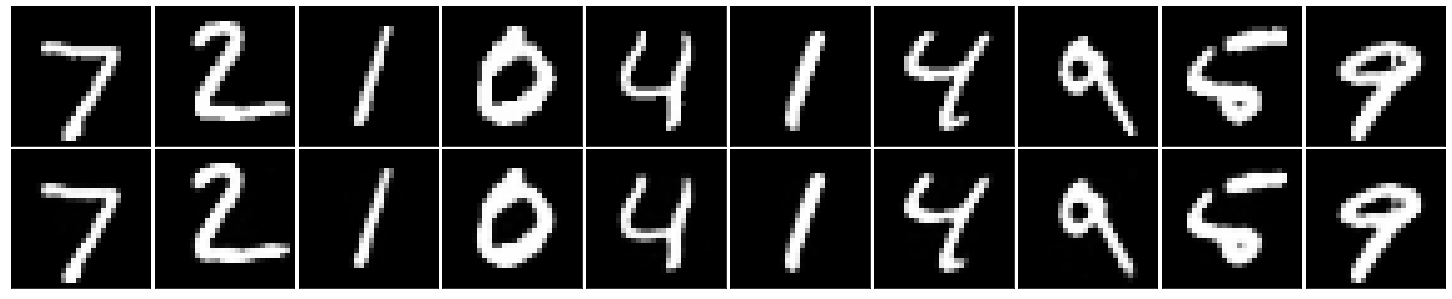

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [26]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.